# Grand Central Terminal - Trajectories
    author: P. Ternes
    created: 31/05/2020

The data assimilation experiments using real data are conducted using information from a video sequence, recorded at Grand Central Terminal (GCT). The original video is a 33:20-minutes video sequence shoot at 25fps with a resolution of 720x480.

The Grand Terminal data is available on the website: http://www.ee.cuhk.edu.hk/~xgwang/grandcentral.html

A large analysis of the real data can be found at [`Grand Central Terminal Callibration notebook`](gcs_callibration.ipynb).

A explanation of the StationSim new version can be found at [`Grand Central Terminal Model notebook`](StationSim_GrandCentral_version.ipynb).

## Introduction

The trajectories were determined through a KLT keypoint tracker on GCT video. Many tracking failures occur due to frequent occlusions in crowded scenes, and most trajectories are highly fragmented with large portions of missing observations.

When we use the particle filter, this fragmentation can be a big problem. 

**In this notebook we have corrected the fragmentation of trajectories.**

## Reading original data file

In [1]:
from scipy.io import loadmat

#open and read original file
file_name = "gcs_real_trajectories.mat"
file = loadmat(file_name)
trajectories = file["trks"][0]

## Organize the data

To facilitate future analysis, the trajectories will be reorganized in a list called "data". Each line in this list will have 4 elements: pedestrian ID, position $x$, position $y$, and time. The positions $x$ and $y$ are  undistorted.

In [2]:
data = []
for i in range (len(trajectories)):
    x, y, t = trajectories[i]
    x, y, t = x.flatten(), y.flatten(), t.flatten()
    for j in range (len(x)):
        values = [i, x[j], y[j], t[j]]  # indices: ['pedestrianID', 'x', 'y', 'time']
        data.append(values)

        
from operator import itemgetter
data3 = []
for i in range (len(data)):
    data[i][2] = -1.* data[i][2] + 455.   # correct upside down
    data3.append(data[i])
    ratio = data[i][2]/431
    data3[i][1] = data[i][1]-347.5 #centre x axis to camera
    data3[i][1] = (data3[i][1] * (1 + ratio)) + 355.1403712296984 # new x position
    data3[i][2] = data[i][2] * (1 + ratio)  # new y position

#sort by frame
data1 = sorted(data3, key=itemgetter(3))

#sort by pedestrian
data2 = sorted(data3, key=itemgetter(0))

## Select 3000 frames from the frame 20000 to 23000.

Just data from this frame interval are analysed.

In [3]:
from operator import itemgetter
data4 = []
for i in range (len(data3)):
    if (data3[i][3] >= 20000 and data3[i][3] < 23000):
        data4.append(data3[i])
        
#sort by frame
data1 = sorted(data4, key=itemgetter(3))

#sort by pedestrian
data2 = sorted(data4, key=itemgetter(0))

## Save the data from 3000 frames in files

### By agent

Each file conteins information about one agent.

In [8]:
import os
directory = 'agents'
if not(os.path.exists(directory)):
    os.mkdir(directory)

agent = data2[0][0]
save_file = open(directory+'/agent_'+ str(agent) +'.dat', 'w')
print('# time', 'x', 'y', file=save_file)
for i in range (len(data2)):
    if (data2[i][0] == agent):
        print(data2[i][3], data2[i][1], data2[i][2], file=save_file)
    else:
        save_file.close()
        agent = data2[i][0]
        save_file = open(directory+'/agent_'+ str(agent) +'.dat', 'w')
        print(data2[i][3], data2[i][1], data2[i][2], file=save_file)
save_file.close()

## Step 1: Remove some informations


### Remove pedestrians that never enter the environment

Remove pedestrians that never enter the environment. It also moves pedestrians that have complete trajectories to a different folder.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
    
def is_within_bounds(boundaries, loc):
    return all(boundaries[0] < loc) and\
           all(loc < boundaries[1])
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]
    deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

boundaries = np.array([[0, 0], [740, 700]])
agentsCompleteTrails = []

directory = 'agents/'
files = os.listdir(directory)
number_files = len(files)
print('before remove/move, the number of file is: ', number_files)

directory1 = 'agents_complete_trails/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)

for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    locI = [x[0], y[0]]
    if not (is_within_bounds(boundaries, locI)):
        locF = [x[-1], y[-1]]
        if not (is_within_bounds(boundaries, locF)):
            dist = normaldist(locI, locF)
            if (dist<130.): # 130 defined by eye
                # Remove agents that never enter the environment.
                os.remove(file_name)
                print(file_name)
            else:
                # moving agents that have complete trajectory to another folder
                shutil.move(file_name, directory1 + agent_file)

files = os.listdir(directory)
number_files = len(files)
print('After remove/move, the number of file is: ', number_files)

before remove/move, the number of file is:  1049
agents/agent_21303.dat
agents/agent_21405.dat
agents/agent_21408.dat
agents/agent_21414.dat
agents/agent_21532.dat
agents/agent_21559.dat
agents/agent_21571.dat
agents/agent_21575.dat
agents/agent_21589.dat
agents/agent_21592.dat
agents/agent_21605.dat
agents/agent_21618.dat
agents/agent_21624.dat
agents/agent_21625.dat
agents/agent_21633.dat
agents/agent_21638.dat
agents/agent_21658.dat
agents/agent_21675.dat
agents/agent_21680.dat
agents/agent_21691.dat
agents/agent_21694.dat
agents/agent_21695.dat
agents/agent_21702.dat
agents/agent_21738.dat
agents/agent_21741.dat
agents/agent_21742.dat
agents/agent_21743.dat
agents/agent_21744.dat
agents/agent_21756.dat
agents/agent_21758.dat
agents/agent_21768.dat
agents/agent_21780.dat
agents/agent_21788.dat
agents/agent_21831.dat
agents/agent_21838.dat
agents/agent_21840.dat
agents/agent_21852.dat
agents/agent_21854.dat
agents/agent_21865.dat
agents/agent_21866.dat
agents/agent_21868.dat
agents/a

### Remove out-of-boundaries positions

Rewrite the position files with only the positions within the station limits.


In [10]:
import numpy as np

def is_within_bounds(boundaries, loc):
    return all(boundaries[0] < loc) and\
           all(loc < boundaries[1])

boundaries = np.array([[0, 0], [740, 700]])
agentsCompleteTrails = []

directory = 'agents/'
files = os.listdir(directory)
for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    save_file = open(directory + agent_file, 'w')
    print('# time', 'x', 'y', file=save_file)
    for i in range(len(x)):
        loc = [x[i], y[i]]
        if (is_within_bounds(boundaries, loc)):
            print(t[i], x[i], y[i], file=save_file)
    save_file.close()

### Remove pedestrians with very short time life

If the pedestrian exists only for 1 second (25 frames) or less, remove!

In [11]:
directory = 'agents/' 
files = os.listdir(directory)

for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    try:
        if(len(t)<25):
            os.remove(file_name)
            print(file_name)
    except TypeError:
        '''
        This error occurs when len(t)=1. In
        this case, the data is read as a float instead of an
        array.
        '''
        print(file_name)
        os.remove(file_name)
        

agents/agent_21502.dat
agents/agent_21403.dat
agents/agent_21517.dat
agents/agent_21464.dat
agents/agent_21521.dat
agents/agent_21546.dat
agents/agent_21465.dat
agents/agent_21561.dat
agents/agent_21581.dat
agents/agent_21585.dat
agents/agent_21586.dat
agents/agent_21484.dat
agents/agent_21591.dat
agents/agent_21603.dat
agents/agent_21609.dat
agents/agent_21643.dat
agents/agent_21665.dat
agents/agent_21679.dat
agents/agent_21689.dat
agents/agent_21724.dat
agents/agent_21726.dat
agents/agent_21733.dat
agents/agent_21747.dat
agents/agent_21784.dat
agents/agent_21789.dat
agents/agent_21791.dat
agents/agent_21797.dat
agents/agent_21812.dat
agents/agent_21818.dat
agents/agent_21824.dat
agents/agent_21859.dat
agents/agent_21862.dat
agents/agent_21864.dat
agents/agent_21892.dat
agents/agent_21911.dat
agents/agent_21856.dat
agents/agent_21912.dat
agents/agent_21914.dat
agents/agent_21935.dat
agents/agent_21941.dat
agents/agent_21948.dat
agents/agent_21956.dat
agents/agent_21990.dat
agents/agen

## Step 2: Put together some trajectories

If a pedestrian has his/her trajectory closed in the middle of the station, it is likely that the rest of his/her trajectory has been associated with one or more pedestrians with a different ID. To identify which trajectories represent the movement of pedestrian $i$, we will initially look for trajectories that have started at most <font color="red"><b> 25 frames</b></font> (1 seconds) after the trajectory of pedestrian $i$ has ended, within a radius of <font color="red"><b> 25 * 0.87 pixels</b></font>  from its final position. The radius is associated with the mean pedestrian velocity determined over all trajectories.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

def is_within_bounds(boundaries, loc):
    return all(boundaries[0] < loc) and\
           all(loc < boundaries[1])
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]
    deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

boundaries = np.array([[0, 0], [740, 700]])

directory = 'agents/'
files = os.listdir(directory)
number_files = len(files)
print(number_files)

time_REF = 1 # time in seconds!
radius_REF = time_REF * 25 * 0.8719127839925644

for agent_file1 in files:
    try:
        file_name1 = directory + agent_file1
        t1, x1, y1 = np.loadtxt(file_name1,unpack=True)
    except OSError:
        pass      
    for agent_file2 in files:
        file_name2 = directory + agent_file2
        try:
            t2, x2, y2 = np.loadtxt(file_name2,unpack=True)
            deltat = t2[0] - t1[-1]
            if(deltat>0 and deltat<time_REF):
                dist = normaldist([x1[-1], y1[-1]], [x2[0], y2[0]])
                if (dist<radius_REF):
                    save_file = open(file_name1, 'w')
                    # save the file2 inside the file1
                    for i in range (len(t1)):
                        print(t1[i], x1[i], y1[i], file=save_file)
                    for i in range (len(t2)):
                        print(t2[i], x2[i], y2[i], file=save_file)
                    save_file.close()
                    # remove the file2
                    os.remove(file_name2)
                    print(file_name1, file_name2)
        except OSError:
            pass

## Step 3: Move pedestrians that have complete trajectories

To prevent finished trajectories from being associated with new trajectories, move pedestrians who have trajectory to another folder (**agents_complete_trails/**). By doing this, the loop from the previous step will also become smaller.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
    
def is_within_bounds(boundaries, loc):
    return all(boundaries[0] < loc) and\
           all(loc < boundaries[1])
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]
    deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

boundaries = np.array([[20, 20], [720, 680]])
agentsCompleteTrails = []

directory = 'agents/'
files = os.listdir(directory)
number_files = len(files)
print('before remove/move, the number of file is: ', number_files)

directory1 = 'agents_complete_trails/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)

for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    locI = [x[0], y[0]]
    if not (is_within_bounds(boundaries, locI)):
        locF = [x[-1], y[-1]]
        if not (is_within_bounds(boundaries, locF)):
            plt.plot(x,y)
            print(file_name)
            # moving agents that have complete trajectory to another folder
            shutil.move(file_name, directory1 + agent_file)

files = os.listdir(directory)
number_files = len(files)
print('After remove/move, the number of file is: ', number_files)

## Step 4: Repeat steps 2 and 3

As we are deleting files by running the loops, some comparisons between trajectories are lost during the execution of the loop. To ensure that all possible trajectories are grouped, repeat steps 2 and 3 until no file is changed. It is a manual and laborious approach, but suitable for that moment.


## Step 5: Plot the complete trajectories to check

The approach taken in step 2 to join pedestrian with different IDs is relatively simple. In this approach, the possibility of more than one pedestrian being started in the same radius is not taken into account and no comparative analysis is performed. In a preliminary analysis we found that the cases where the trajectories are selected incorrectly represent a small percentage. However, it is recommended that the new trajectories are checked systematically to avoid errors. To do that, plot the trajectories and look the results.

If something looks wrong, split the file into two files and move them to the 'agents' folder so they can be processed again.

In [8]:
def plot_station():
    # plotting the station walls
    a = [0, 0, 740, 740, 0]; b = [-190, 700, 700, -190, -190];
    a = [0, 0, 740, 740, 0]; b = [0, 700, 700, 0, 0]; plt.plot(a,b,'-', linewidth=1,color='k')

    # plotting the station gate 0
    a = [-150, 0, 0, -150, -150]; b = [400, 400, 150, 150, 400];
    plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(-84, 252, '0', fontsize=12)

    # plotting the station gate 1
    a = [0, 250, 250, 0, 0]; b = [850, 850, 700, 700, 850];
    plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(112, 770, '1', fontsize=12)

    # plotting the station gate 2
    a = [455, 700, 700, 455, 455]; b = [850, 850, 700, 700, 850];
    plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(560, 770, '2', fontsize=12)

    # plotting the station gate 3
    a = [740, 860, 860, 740, 740];
    b = [700, 700, 610, 610, 700]; plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(784, 630, '3', fontsize=12)

    # plotting the station gate 4
    a = [740, 860, 860, 740, 740]; b = [550, 550, 400, 400, 550];
    plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(784, 455.0, '4', fontsize=12)

    # plotting the station gate 5
    a = [740, 860, 860, 740, 740]; b = [340, 340, 190, 190, 340];
    plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(784, 252, '5', fontsize=12)

    # plotting the station gate 6
    a = [740, 860, 860, 740, 740];
    b = [130, 130, 0, 0, 130]; plt.plot(a, b,'-',linewidth=2,color='b'); plt.text(784, 42,  '6', fontsize=12)

    # plotting the station gate 7
    a = [555, 740, 740, 555, 555]; b = [0, 0, -70, -70, 0]; plt.plot(a, b, linewidth=2,color='b')
    plt.text(630, -49.0, '7', fontsize=12)

    # plotting the station gate 8
    a = [370, 555, 556, 370, 370]; b = [0, 0, -70, -70, 0]; plt.plot(a, b, linewidth=2,color='b')
    plt.text(448,-49, '8', fontsize=12)

    # plotting the station gate 9
    a = [185, 370, 370, 185, 185]; b = [0, 0, -70, -70, 0]; plt.plot(a, b, linewidth=2,color='b')
    plt.text(266, -49.0, '9', fontsize=12)

    # plotting the station gate 10
    a = [0, 185, 185, 0, 0]; b = [0, 0, -70, -70, 0]; plt.plot(a, b, linewidth=2,color='b')
    plt.text(63.0, -49.0, '10', fontsize=12)

In [198]:
directory = 'agents_complete_trails/'

files = os.listdir(directory)

directory1 = 'trails/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)
    
for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    fig, ax = plt.subplots(num=None,figsize=(7.4, 7),dpi=128,facecolor='w',edgecolor='k')
    plot_station()
    plt.plot(x,y, 'k')
    plt.plot(x[0],y[0], 'o', ms=10, color='r')
    
    file_name =  directory1 + agent_file + '.png'
    plt.savefig(file_name)
    plt.close()

## Step 6: Repeat steps 2, 3, 4 and 5.

After performing the steps above until all possible files are changed and moved to another folder, it is necessary change the radius of comparison. Increase the time by 1 second and repeat steps 2 to 5. Then increase the time again by 1 second and repeat the entire procedure. Do this until all trajectories are selected.

It is important to note that as the radius increases, the probability of selecting an incorrect trajectory increases. The bigger the radius, the more important step 5. On the other hand, the number of files will be smaller for the tests using larger radius, which will facilitate the manual part of the process

It is also important to note that in the end, there will be some short trajectories that could not be related to any pedestrian.

## Step 7: Gates in and out

To determine the starting and ending gate for each pedestrian, we will calculate the distance between the starting/ending position and the gates. The minimum distance is related to the desired gate. The more complete the trajectory, the better the gate selection. However, not all trajectories are complete. Therefore, after determining the initial and final gates using this code, check the figures in the **trails folder**. If any gate was determined incorrectly, open the **gates.dat** file and manually change the gate.

In [17]:
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]
    deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

# gates locations!
gates_locations =\
    np.array([[0, 275],  # gate 0
              [125, 700],   # gate 1
              [577.5 , 700],  # gate 2
              [740, 655],  # gate 3
              [740, 475],  # gate 4
              [740, 265],   # gate 5
              [740, 65],   # gate 6
              [647.5, 0],   # gate 7
              [462.5, 0],   # gate 8
              [277.5, 0],   # gate 9
              [92.5, 0]])   # gate 10

n_gates = len(gates_locations)
gates = []
import os
import numpy as np
import matplotlib.pyplot as plt

directory = 'agents_complete_trails/'
files = os.listdir(directory)
directory1 = 'trails/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)
save_file = open('gates.dat', 'w')
yy = []
j = 0
for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    fig, ax = plt.subplots(num=None,figsize=(7.4, 7),dpi=128,facecolor='w',edgecolor='k')
    plot_station()
    plt.plot(x,y, 'k')
    plt.plot(x[0],y[0], 'o', ms=10, color='r')
    
    gate_in = 0
    gate_out = 0
    min_dist_in = 700
    min_dist_out = 700
    for i in range(n_gates):
        dist_in = normaldist(gates_locations[i], [x[0], y[0]])
        dist_out = normaldist(gates_locations[i], [x[-1], y[-1]])
        if (dist_in < min_dist_in):
            gate_in = i
            min_dist_in = dist_in
        if (dist_out < min_dist_out):
            gate_out = i
            min_dist_out = dist_out
    print(j, gate_in, gate_out, file=save_file)        
    plt.plot(gates_locations[gate_in][0], gates_locations[gate_in][1], 'o', ms=10, color='b')
    plt.plot(gates_locations[gate_out][0], gates_locations[gate_out][1], 's', ms=10, color='b')
    file_name =  directory1 +str(j)+ '.png'
    plt.savefig(file_name)
    plt.close()
    j += 1
save_file.close()

## Step 8: Data correction

It is necessary to make 3 types of corrections in the data:

* Delete data outside station at the entrance;
* Delete data outside station at the exit;
* Complete the trajectory at the intervals that are missing;

Final data will be saved in the pedestrian_data folder

In [ ]:
import numpy as np
gates_locations = np.array([[0, 275], [125, 700], [577.5 , 700], [740, 655], [740, 475], [740, 265], [740, 65], 
                            [647.5, 0], [462.5, 0], [277.5, 0], [92.5, 0]])
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]; deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

def is_inside(gate, x, y, tolerance):
        if(gates_locations[gate][0] == 0):
            if(x <= 0+tolerance):
                return False
            else:
                return True
        elif(gates_locations[gate][0] == 740):
            if(x>=740-tolerance):
                return False
            else:
                return True
        elif(gates_locations[gate][1] == 0):
            if(y <= 0+tolerance):
                return False
            else:
                return True
        else:
            if(y >= 700-tolerance):
                return False
            else:
                return True

def new_position(position_desire, initial_x, initial_y, speed):
    direction = (position_desire - [initial_x, initial_y])/\
                normaldist(gates_locations[_in], [initial_x, initial_y])
    noise = np.random.normal(2.5, 0.5, [2])
    initial_x = initial_x + noise[0]*direction[0]*speed # timestep = 1.0
    initial_y = initial_y + noise[1]*direction[1]*speed # timestep = 1.0
    return initial_x, initial_y
    
    
directory = 'agents_complete_trails/'
files = os.listdir(directory)

directory1 = 'pedestrian_data/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)

id_, gate_in, gate_out  = np.loadtxt('gates.dat',unpack=True)

i = 0
for agent_file in files:
    # open trajectory file
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    
    _in = int(gate_in[i]); _out = int(gate_out[i])
    # excluding values outside station
    while not (is_inside(_in, x[0], y[0], 1)):
        x = np.delete(x, [0]); y = np.delete(y, [0]); t = np.delete(t, [0])
    while not (is_inside(_out, x[len(x)-1], y[len(y)-1], 1)):
        x = np.delete(x, [len(x)-1]); y = np.delete(y, [len(y)-1]); t = np.delete(t, [len(t)-1])

    # getting some usefull informations
    initial_time = t[0]; initial_x = x[0]; initial_y = y[0]
    final_time = t[-1]; final_x = x[-1]; final_y = y[-1]
    initial_new_lines = []; final_new_lines = []
    speed = normaldist([x[0], y[0]], [x[-1], y[-1]]) / (t[-1] - t[0])

    # open a new file to store the complete trails.
    save_file = open(directory1 + 'agent_' + str(i)+'.dat', 'w')

    # estimating the beginning of the trajectory
    while(is_inside(_in, initial_x, initial_y, 1.05*7)):
        initial_x, initial_y = new_position(gates_locations[_in], initial_x, initial_y, speed)
        initial_time -= 1.0;
        initial_new_lines.insert(0,[initial_time, initial_x, initial_y])

    # saving the beginning of the trajectory
    for line in initial_new_lines:
        print(line[0], line[1], line[2], file=save_file)

    # estimating and saving the intermediate parts of the trajectory
    tpass= t[0]-1
    for j in range(len(t)-1):
        if(t[j]>tpass+1):
            initial_x = x[j-1]
            initial_y = y[j-1]
            speed1 = normaldist([x[j-1], y[j-1]], [x[j], y[j]]) / (t[j-1] - t[j])
            for k in range (int(tpass), int(t[j]), 1):
                tpass+=1
                initial_x, initial_y = new_position(np.array([x[j], y[j]]), initial_x, initial_y, speed1)
                print(tpass, initial_x, initial_y, file=save_file)
        else:
            tpass+=1
            print(t[j], x[j], y[j], file=save_file)
            
    # estimating the end of the trajectory
    while(is_inside(_out, final_x, final_y, 1.05*7)):
        final_x, final_y = new_position(gates_locations[_out], final_x, final_y, speed)
        final_time += 1.0; #initial_x = location[0]; initial_y = location[1]
        final_new_lines.append([final_time, final_x, final_y])

    # saving the end of the trajectory
    for line in final_new_lines:
        print(line[0], line[1], line[2], file=save_file)
    save_file.close()

    i += 1

## Final Step: Organize the data to use in the StationSim_gcs model

Create a file called **activation.dat** and put the pedestrian ID, time activation, gate in, gate out, and speed informations. Also creates files separeted by frames, where each frame file has the pedestrian positions.

In [285]:
def normaldist(locI, locF):
    deltaX = locI[0] - locF[0]
    deltaY = locI[1] - locF[1]      
    return np.sqrt(deltaX*deltaX + deltaY*deltaY)

directory = 'pedestrian_data/'
files = os.listdir(directory)
n_files = len(files)
id_, gate_in, gate_out  = np.loadtxt('gates.dat',unpack=True)
directory1 = 'gcs_final_real_data/'
if not(os.path.exists(directory1)):
    os.mkdir(directory1)

save_file1 = open(directory1 + 'activation.dat', 'w')
print('#', 'pedestrianID', 'time_activation', 'gate_in', 'gate_out', 'speed', file=save_file1)
data = []
for i in range(n_files):
    # open trajectory file
    file_name = directory + 'agent_' + str(i) + '.dat'
    t, x, y = np.loadtxt(file_name,unpack=True)
    for j in range (len(x)):
        values = [int(i), x[j], y[j], t[j]-19620]  # indices: ['pedestrianID', 'x', 'y', 'time', gate_in, gate_out]
        data.append(values)
    speed = normaldist([x[0], y[0]], [x[-1], y[-1]]) / (t[-1] - t[0])
    print(int(i), t[0]-19620, int(gate_in[i]), int(gate_out[i]), speed, file=save_file1)
save_file1.close()

from operator import itemgetter
#sort by frame
data1 = sorted(data, key=itemgetter(3))

frame = data1[0][3]
print(frame)
save_file = open(directory1+'frame_'+ str(frame) +'.dat', 'w')
print('#', 'pedestrianID', 'x', 'y', file=save_file)

for i in range (len(data1)):
    if (data1[i][3] == frame):
        print(data1[i][0], data1[i][1], data1[i][2], file=save_file)
    else:
        save_file.close()
        frame = data1[i][3]
        save_file = open(directory1+'/frame_'+ str(frame) +'.dat', 'w')
        print('#', 'pedestrianID', 'x', 'y', file=save_file)
        print(data1[i][0], data1[i][1], data1[i][2], file=save_file)
save_file.close()


1.0


## Remove unnecessary files and folders

For experiments using the particle filter only files in the **gcs_final_real_data** folder are needed. All other files and folders can be deleted.

## Velocity after put trajectories together

80
Velocities in pixel/frame:
Adjusted Gaussian distribution with mean of  0.8326397353584887 pixel/frame
Adjusted Gaussian distribution with standard deviation of  0.45479218595076887 pixel/frame
Minimum speed:  0.10882306094443399 pixel/frame


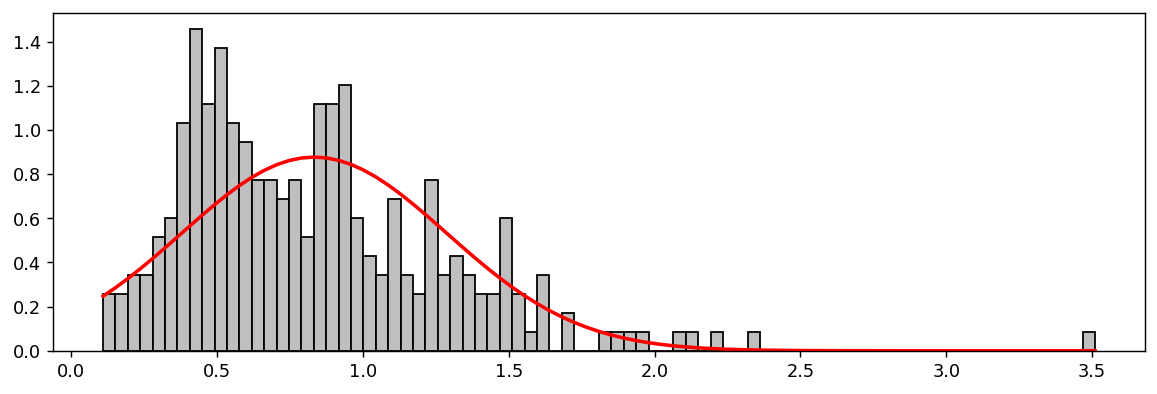

In [243]:
import os
import numpy as np

directory = 'pedestrian_data/'
files = os.listdir(directory)
i = 0

yy = []
for agent_file in files:
    file_name = directory + agent_file
    t, x, y = np.loadtxt(file_name,unpack=True)
    deltaX = x[-1] - x[0]
    deltaY = y[-1] - y[0]           
    delta = np.sqrt(deltaX*deltaX + deltaY*deltaY)
    vel = delta / float(len(x))
    yy.append(vel)  
    
fig, ax = plt.subplots(num=None,figsize=(11, 3.5),dpi=128,facecolor='w',edgecolor='k',sharex='col',sharey='row')

import math
n_bins = 20*math.ceil(max(yy) - min(yy))
print(n_bins)
n, bins, patches = plt.hist(yy, bins=n_bins, density=True, color='0.75', edgecolor='k', lw = 1)

from scipy.stats import norm
import scipy.stats as scs
# determining fitting parameters
(mu, sigma) = norm.fit(yy)
#plt.xlim(0, 2.*mu) 

# plot adjusted normal distribution
y = scs.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, '-', color='r', lw = 2)

print('Velocities in pixel/frame:')
print('Adjusted Gaussian distribution with mean of ', mu, 'pixel/frame')
print('Adjusted Gaussian distribution with standard deviation of ', sigma, 'pixel/frame')
print('Minimum speed: ', min(yy), 'pixel/frame')


## Number of pedestrians after put trajectories together

Note that as pedestrians are no longer disabled for a few steps, the number of pedestrians in the scene increases.

8371 8371


(0.0, 90.0)

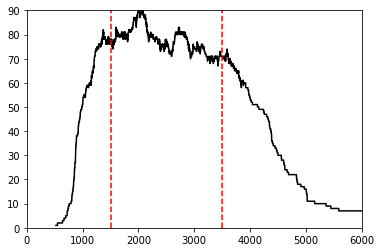

In [283]:
directory = 'gcs_final_real_data/'
files = os.listdir(directory)
n_files = len(files)

frame = 521
xx = []
yy = []

for i in range(n_files-1):
    file = directory + 'frame_' + str(frame) + '.0.dat'
    ID, x, y = np.loadtxt(file, unpack=True)
    try:
       
        yy.append(len(x))
        xx.append(frame)
    except TypeError:
        xx.append(frame)
        yy.append(1)
        
    frame += 1
print(len(xx), len(yy))    
plt.plot(xx, yy, '-', color='k')

x = [1500, 1500]; y = [0, 90]
plt.plot(x,y,'--', color = 'r')
x = [3500, 3500]; y = [0, 90]
plt.plot(x,y,'--', color = 'r')
plt.xlim(0,6000)
plt.ylim(0,90)
